## White Noise
White noise is  aspecial type of TS, where the data does'nt follow a pattern. It is a sequence of random data, where every value has a time-period associated with it

For a time series to be a white noise, the folowing must be satisfied:

* Constant Mean
* Constant Variance
* No Autocorrelation in any period: No clear relationship between past and present values.

**Note,** We an't predict whitenoise data since the data is essentailly random and we can't find a pattern that we expect to be found as we progress through time.

### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [7]:
# Add whitenoise to the dataframe
df['wn'] = wn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1097.093129
std,292.559287,290.868797
min,438.920000,85.767682
25%,914.620000,903.297070
50%,1144.650000,1095.998071
75%,1316.280729,1296.771934
max,1570.252238,2351.054075


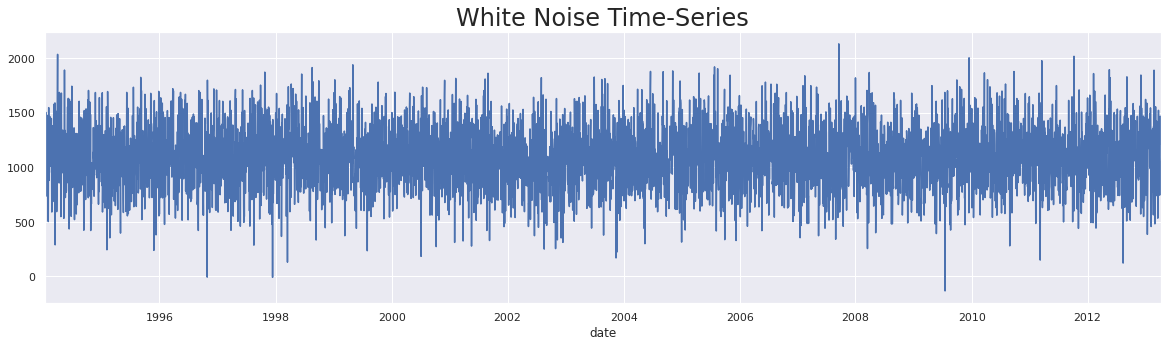

In [8]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

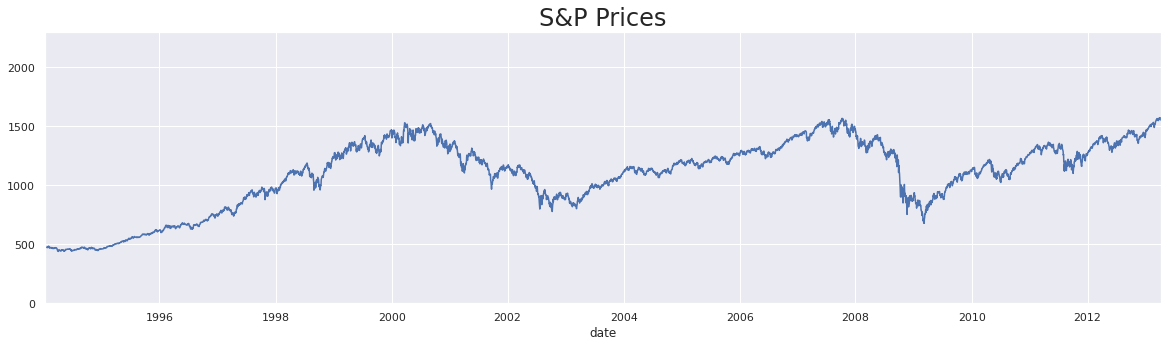

In [10]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk
It is a special type of Time-Series where valeus tend to persist over time and the differences betweeen periods are whitenoise

In [0]:
rw = pd.read_csv("/content/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [0]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [12]:
df['rw'] = rw.price

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1004.694623,1122.139662
1994-01-10,475.27,1277.579735,1080.347860
1994-01-11,474.13,1438.191500,1082.095245
1994-01-12,474.17,1349.106458,1083.639265
1994-01-13,472.47,1348.701089,1067.146255


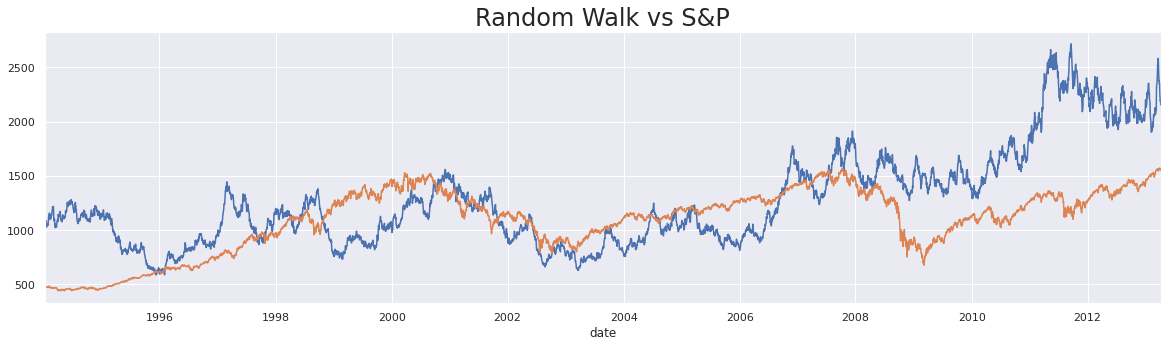

In [14]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity
implies taking consecutive data eith the same size having identical covariances regardless fo the srarting point.

**Assumptions of Stationarity**
* Constant Mean
* Constant Variance
* Covxn = Covxm

## Dickey Fuller Test

In [15]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [18]:
sts.adfuller(df.wn)

(-71.80357214733651,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 70737.05642539426)

In [19]:
sts.adfuller(df.rw)

(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

### Seasonality
suggests that certain trends will apppear on a cyclical basis.

To test for seasonality;

* Decompostion --split into 3 effects:
trend:--pattern
seasonal--cyclical effects
 and residual---error of prediction

 The simplest form of decompositon is the **Naive Decomposition** which comprises of;
 * Additve: assumes observed = trend+ seasonal + residual
 * Multiplicative: observed = trend*seasonal*residual

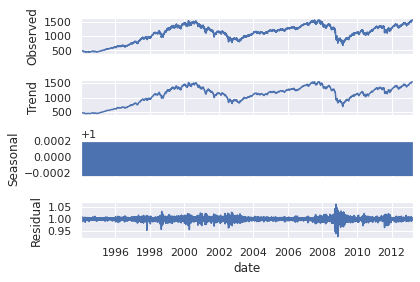

In [22]:
s_dec_addictive = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_addictive.plot()
plt.show()

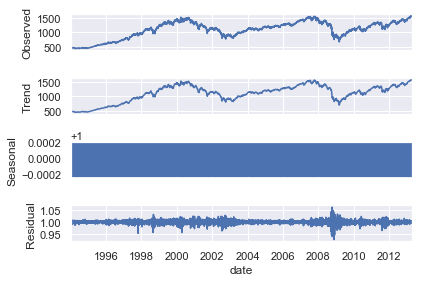

In [0]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

## Correlatio

Measures the similarity in the change of two series.

**Autocorrelation** represents the correlation between a sequence and itself. It meaures the level of resemblance between a sequence from several period ago from the actual data

### ACF--Auto correlatio Function

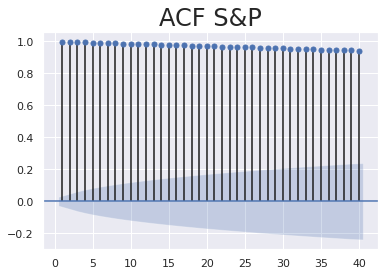

In [23]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### PACF--Partial Auto correlation.
It is useful whe we need to determine only direct relationship between time-series and its lag version.

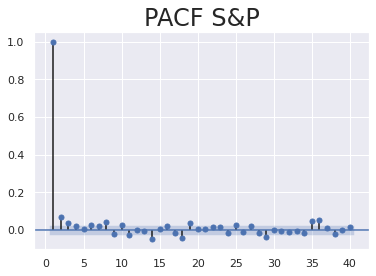

In [24]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

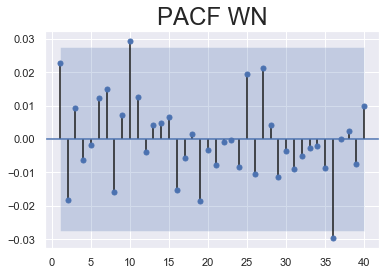

In [0]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

## Picking the Corect Model

Log-Likelihhod Ratio Test can be applied to models with differernt degrees of freddom. It is used to test model performance

* Residuals should resamble whitenoise
* For simplicity, a model with a lower AIC and BIC information criteria is best.

If we're comparing two model and we want to choose the better fit, then we choose the one with "Higher Log-Likelihood and lower inforamtion criteria"